In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
CSV_FILE = '../content/fruits.csv'
df = pd.read_csv(CSV_FILE)
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


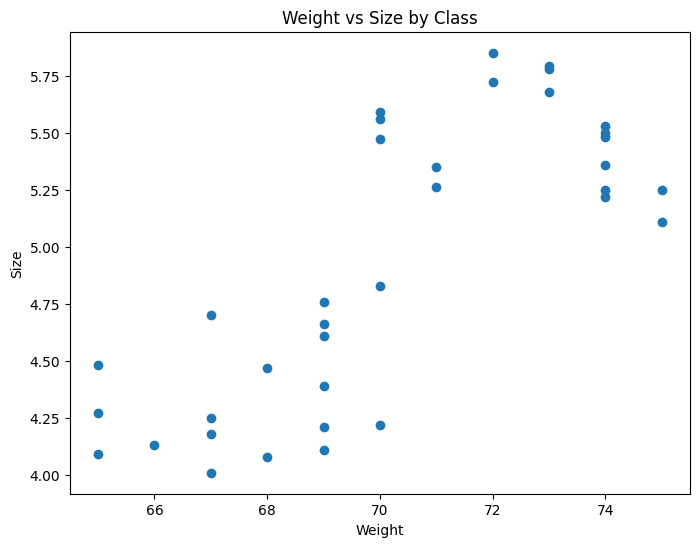

In [5]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Weight'], df['Size'])

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Weight vs Size by Class')

# Display the plot
plt.show()

In [6]:
X = df[['Weight', 'Size']]
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [7]:
Y = df['Class']
Y.head()

0    orange
1    orange
2    orange
3     apple
4    orange
Name: Class, dtype: object

In [8]:
LgModel = LogisticRegression()
LgModel.fit(X, Y)
LgModel.coef_
LgModel.intercept_
LgModel.score(X, Y)

1.0